# Experimental distribution flares


In [ ]:

# The data format in these files changes slightly at years 1977 and 1982.
# The format is given below.

# Columns Quantity
# 1-4     Year
# 5-6     Month
# 7-8     Day of month
# 9-12    Time in thousandths of day (.500 = 1200 UT)
# 13-20   Greenwich sunspot group # through 1976; NOAA/USAF grp # after 1976

# 21-22   00 1874-1976
# 23-24   Greenwich Group type

# 21      Suffix to group number 1982 to present
# 22-24   NOAA Group type (A=Alpha, B=Beta, D=Delta, G=Gamma) 1982 to present

# 25      Single space
# 26-29   Observed umbral area in millionths of solar disk 1874 through 1976

# 26-29      0 from 1977 to present (umbral area unavailable from NOAA)

# 30      Single space
# 31-34   Observed whole spot area in mill. of sol. disk
# 35      Single space
# 36-39   Corrected (for foreshortening) umbral area in millionths of solar
#         hemisphere, 1874 through 1976

# 36-39       0 from 1977 to present (umbral area unavailable from NOAA)
# 40      Single space
# 41-44   Corrected whole spot area in millionths of solar hemisphere
# 45      Single space
# 46-50   Distance from center of solar disk in disk radii
# 51      Single space
# 52-56   Position angle from heliographic north (0=north, 90=east limb)
# 57      Single space
# 58-62   Carrington Longitude in degrees
# 63      Single space
# 64-68   Latitude, negative to the South
# 69      Single space
# 70-74   Central  meridian distance, negative to the East.

In [ ]:
import os
import re

def count_flares_by_latitude(directory, start_year=1874, end_year=2013, 
                             latitude_ranges=[(-30, -15), (-15, 0), (0, 15), (15, 30)]):
  """
  Counts the number of flares within specified latitude ranges in text files.

  Args:
      directory: The directory containing the text files.
      start_year: The starting year of the files.
      end_year: The ending year of the files.
      latitude_ranges: A list of latitude ranges to count flares within.

  Returns:
      A dictionary containing the count of flares for each latitude range.
  """

  flare_counts = {}
  for range_start, range_end in latitude_ranges:
      flare_counts[(range_start, range_end)] = 0

  for year in range(start_year, end_year + 1):
      filename = f"g{year}.txt"
      filepath = os.path.join(directory, filename)

      if os.path.exists(filepath):
          with open(filepath, "r") as file:
              for line in file:
                  line = line.strip()
                  if not line or line.startswith("#"):
                      continue  # Skip empty lines or comments

                  # Extract latitude data based on year range
                  if year <= 1976:
                      latitude = int(line[64:68])
                  else:
                      latitude = int(line[63:67])

                  # Check if latitude falls within a range
                  for range_start, range_end in latitude_ranges:
                      if range_start <= latitude <= range_end:
                          flare_counts[(range_start, range_end)] += 1

  return flare_counts

# Example usage
directory = "path/to/your/files"
flare_counts = count_flares_by_latitude(directory)

print(flare_counts)

In [10]:
import os
import re

def count_flares_by_latitude(directory, start_year=1874, end_year=2013):
    """
    Counts the number of flares within specified latitude ranges in text files.

    Args:
        directory: The directory containing the text files.
        start_year: The starting year of the files.
        end_year: The ending year of the files.

    Returns:
        A list containing the latidudes of all flares.
    """
    lat_list=[]

    for year in range(start_year, end_year + 1):
        filename = f"g{year}.txt"
        filepath = os.path.join(directory, filename)

        if os.path.exists(filepath):
            with open(filepath, "r") as file:
                for line in file:
                    line = line.strip()
                    if not line or line.startswith("#"):
                        continue  # Skip empty lines or comments
                    latitude = float(line[63:69])
                    if int(line[13:21]) !=0:
                        lat_list.append(latitude)


    return lat_list

# Example usage
directory = "RGO_NOAA1874_2013"
flare_counts = count_flares_by_latitude(directory)

print(flare_counts)

ValueError: invalid literal for int() with base 10: '        '

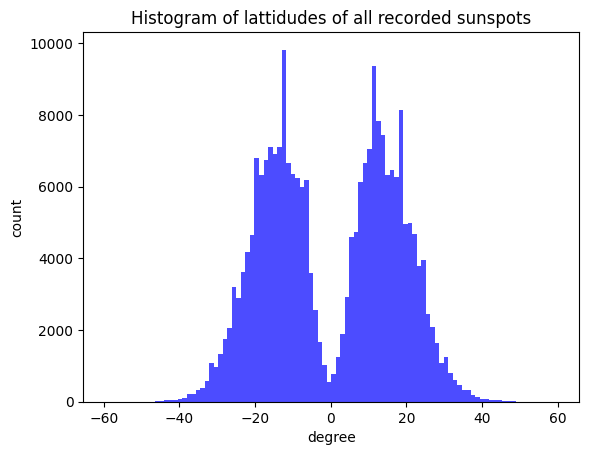

In [46]:
import matplotlib.pyplot as plt
import numpy as np


# Create a histogram
h = plt.hist(flare_counts, bins=100, color='blue', alpha=0.7)

# Customize the plot
plt.title('Histogram of lattidudes of all recorded sunspots') # \n https://solarscience.msfc.nasa.gov/greenwch.shtml'
plt.xlabel('degree')
plt.ylabel('count')

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


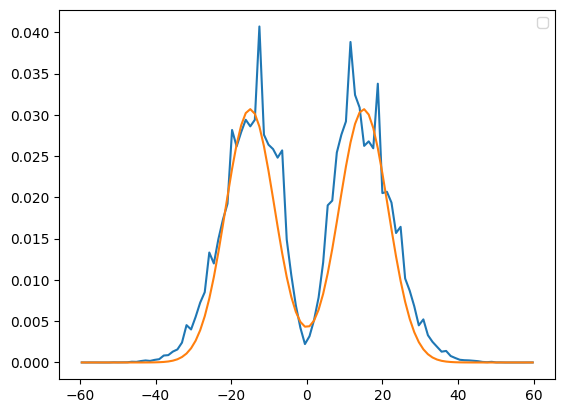

In [30]:
x = h[1]
f = h[0]
x = np.linspace(np.min(x), np.max(x), len(f))

from scipy.stats import norm
f2 = f #f / 2/np.pi / np.cos(x / 180 * np.pi) / np.sum(f)
f2 = f2 / np.sum(f2)

plt.plot(x, f2) 
loc = -15
scale = 6.5
plt.plot(x, (norm.pdf(x, -loc, scale) + norm.pdf(x, loc, scale))/2, )
plt.legend()

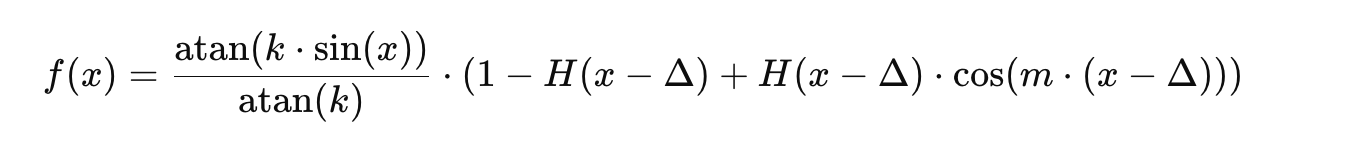
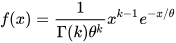

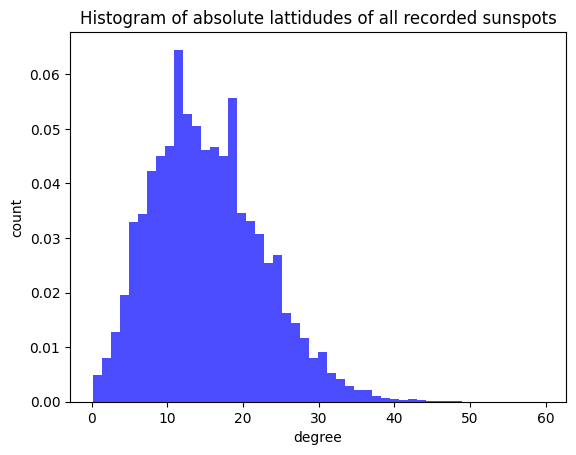

In [47]:
# Create a histogram
h = plt.hist(np.abs(flare_counts), bins=50, color='blue', alpha=0.7, density=True)

# Customize the plot
plt.title('Histogram of absolute lattidudes of all recorded sunspots')# \n https://solarscience.msfc.nasa.gov/greenwch.shtml')
plt.xlabel('degree')
plt.ylabel('count')

# Show the plot
plt.show()

[3.66098139 4.34921873]


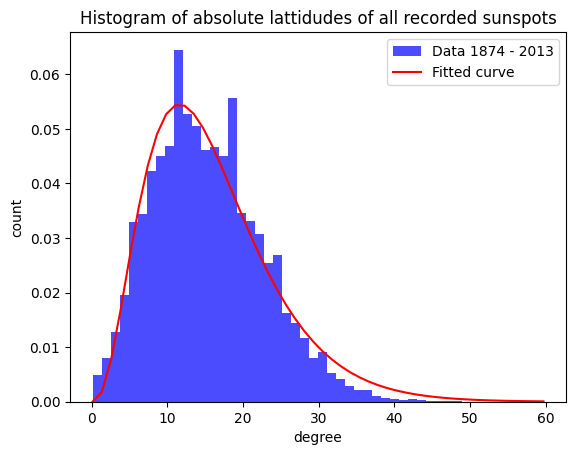

In [50]:
import numpy as np
import scipy.optimize as opt

import scipy.special as sc

result = sc.gamma(5)

def gamma_dist(x, k, theta):
    # f(x) = 1/(gamma (k) theta^k) x^(k-1) e^(-x/theta)
    x = np.abs(x)
    return 1/ (sc.gamma(k) * theta ** k ) * x ** (k-1) * np.exp(- x / theta ) 

# Sample data
x = h[1]
f = h[0]
x = np.linspace(np.min(x), np.max(x), len(f))

# Fit the exponential curve
popt, pcov = opt.curve_fit(gamma_dist, x, f)

# Extract parameters
k_fit, theta_fit = popt
print(popt)

# Evaluate the fitted function
f_fit = gamma_dist(x, k_fit, theta_fit)

# Plot the data and the fitted curve
h = plt.hist(np.abs(flare_counts), bins=50, color='blue', alpha=0.7, density=True, label="Data 1874 - 2013")
plt.plot(x, f_fit, 'r-', label='Fitted curve')
plt.title('Histogram of absolute lattidudes of all recorded sunspots')# \n https://solarscience.msfc.nasa.gov/greenwch.shtml')
plt.xlabel('degree')
plt.ylabel('count')
plt.legend()
plt.show()

[4.3094226  3.59918326]


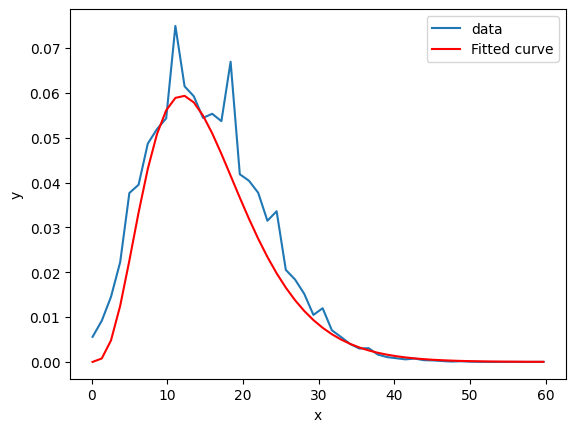

In [42]:
# same thing but with corrected for latitude circle length

def gamma_dist(x, k, theta):
    # f(x) = 1/(gamma (k) theta^k) x^(k-1) e^(-x/theta)
    x = np.abs(x)
    return 1/ (sc.gamma(k) * theta ** k ) * x ** (k-1) * np.exp(- x / theta ) 



# Sample data
x = h[1]
f = h[0]
x = np.linspace(np.min(x), np.max(x), len(f))
f2 = f / 2/np.pi / np.cos(x / 180 * np.pi)
f2 = f2 / np.sum(f2)

# Fit the exponential curve
popt, pcov = opt.curve_fit(gamma_dist, x, f2)

# Extract parameters
k_fit, theta_fit = popt
print(popt)

# Evaluate the fitted function
f_fit = gamma_dist(x, k_fit, theta_fit)

# Plot the data and the fitted curve
plt.plot(x, f2, label='data')
plt.plot(x, f_fit, 'r-', label='Fitted curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Rice function

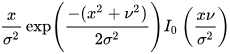

[ 9.02769086 10.48768514]


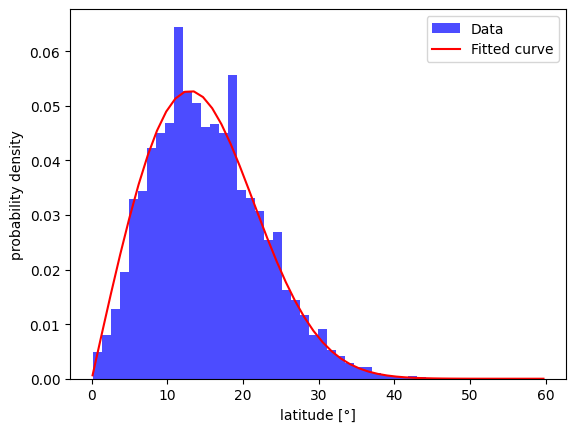

In [45]:


result = sc.gamma(5)

def rice_dist(x, sigma, nu):
    x = np.abs(x)
    return x / sigma**2 * np.exp( - (x**2 + nu **2 ) / (2 * sigma **2)) * sc.iv(0, (x * nu / sigma**2))

# Sample data
x = h[1]
f = h[0]
x = np.linspace(np.min(x), np.max(x), len(f))

# Fit the exponential curve
popt, pcov = opt.curve_fit(rice_dist, x, f)

# Extract parameters
sigma_fit, nu_fit = popt
print(popt)

# Evaluate the fitted function
f_fit = rice_dist(x, sigma_fit, nu_fit)

# Plot the data and the fitted curve
h = plt.hist(np.abs(flare_counts), bins=50, color='blue', alpha=0.7, density=True, label="Data")
plt.plot(x, f_fit, 'r-', label='Fitted curve')
plt.xlabel('latitude [°]')
plt.ylabel('probability density')
plt.legend()
plt.show()

In [ ]:
# general distribution for area 
def rice_dist(x, sigma, nu):
    x = np.abs(x)
    return x / sigma**2 * np.exp( - (x**2 + nu **2 ) / (2 * sigma **2)) * sc.iv(0, (x * nu / sigma**2))

sigma_fit, nu_fit = (9.02769086, 10.48768514)

def rho(alpha):
    return rice_dist(alpha, sigma_fit, nu_fit)